# Load Datasets

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

playerdata_1718season = '.\playerstatsbygame_20172018_regularseason.csv'
playerseason_data = '.\Seasons_Stats.csv'
salarydata = './nba_salaries_1990_to_2018.csv'
rpm_data = './RPM_data.xlsx'

playerstats_1718 = pd.read_csv(playerdata_1718season)
playerseasondata = pd.read_csv(playerseason_data)
salarydata = pd.read_csv(salarydata)
rpmdata = pd.read_excel(rpm_data, sheet_name='Agg')

## Creating clean dataset to work with:
- Remap team names to match between stats & salary data
- Combine salary & stats by merging datasets on [Player, Year, Team], for seasons ending 1990-2017
- Get rid of duplicate/unnecessary columns
- Rename columns

In [3]:
# Team names are slightly different between stats & salary, so need to remap before joining:

team_map = {'ATL': 'ATL','BOS': 'BOS','BRK': 'NJN','CHA': 'CHA','CHH': 'CHA','CHI': 'CHI','CHO': 'CHA',
'CLE': 'CLE','DAL': 'DAL','DEN': 'DEN','DET': 'DET','GSW': 'GSW','HOU': 'HOU','IND': 'IND','LAC': 'LAC',
'LAL': 'LAL','MEM': 'MEM','MIA': 'MIA','MIL': 'MIL','MIN': 'MIN','NJN': 'NJN','NOH': 'NOH','NOK': 'NOH',
'NOP': 'NOP','NYK': 'NYK','OKC': 'OKC','ORL': 'ORL','PHI': 'PHI','PHO': 'PHO','POR': 'POR','SAC': 'SAC',
'SAS': 'SAS','SEA': 'SEA','TOR': 'TOR','TOT': 'TOT','UTA': 'UTA','VAN': 'MEM','WAS': 'WAS','WSB': 'WAS'}

playerseasondata['Tm'] = playerseasondata['Tm'].map(team_map)

In [8]:
# combine salary data (1990 - 2017 season end) with stats for one giant player table
# Note, each year is the season end year
# Combine based on player, season, & team (players may have played on >1 team in a season, so this makes sure we join right)

stats = playerseasondata.loc[playerseasondata.loc[:, 'Year'] > 1990, :]
salary = salarydata.loc[salarydata.loc[:, 'season_end'] <=2017, :]
data = stats.merge(salary, left_on=['Player', 'Year', 'Tm' ], right_on = ['player', 'season_end', 'team'], how='outer')

#get rid of columns I don't want/duplicates and rename existing for clarity

data.drop(['Unnamed: 0','3PAr', 'blank2',
 'blanl', 'BPM', 'DBPM', 'eFG%', 'FTr', 'OBPM', 'team_name', 'VORP', 'WS/48'], axis=1, inplace=True)

data.rename(columns={ '2PA':'2PAttempt', '2P':'2PMade', '2P%':'2Pt%', '3P%':'3Pt%',
 '3PA':'3PtAttempt', '3P':'3PtMade', 'Age':'Age_seasonEnd', 'AST%':'Assist%',
 'AST':'Assists', 'BLK%':'Block%', 'BLK':'Blocks', 'DRB%':'Drebound%',
 'DRB':'Drebounds', 'DWS': 'Dwinshares', 'FG%':'FG%', 'FGA':'Fgattempt', 'FG':'Fgmade',
 'FT%':'FT%', 'FTA':'FTAttempt', 'FT':'FTMade', 'G':'Games',
 'GS':'GamesStarted', 'MP':'MinPlayed', 'ORB':'Offrb', 'ORB%':'OffRb%',
 'OWS': 'OffWinShares', 'PER':'PER', 'PF':'PersonalFouls', 'Player':'Player', 'player':'player',
 'Pos':'Position', 'PTS':'Pts', 'salary':'Salary', 'season_end':'Season_End',
 'season_start':'Season_Start', 'STL%':'Steal%', 'STL':'Steals',
 'team':'Team', 'Tm': 'Stats_Team', 'TRB%':'TotalRbnd%', 'TRB':'TotalRbnds',
 'TS%':'TS%', 'TOV':'Turnover', 'TOV%':'Turnover%','USG%':'Usg%', 'WS':'WinShares', 'Year': 'Stats_SeasonEnd'}, inplace=True)

# EDA time

## Dealing with missing values:
- There are a lot of missing values initially:
    - Stats dataset loaded all '0' stats as NaN, so replace with 0s
    - Joining the salary & stats tables via 'outer' join allowed for a lot of blanks where tables didn't both have data
- For missing salary data, I chose to add the average salary of the player if they have >1 entry.  If the player has just one entry and salary is missing, I am getting rid of the datapoint.

In [9]:
data.isnull().sum()

Stats_SeasonEnd    1446
Player             1446
Position           1446
Age_seasonEnd      1446
Stats_Team         1446
Games              1446
GamesStarted       1446
MinPlayed          1446
PER                1451
TS%                1516
OffRb%             1451
Drebound%          1451
TotalRbnd%         1451
Assist%            1451
Steal%             1451
Block%             1451
Turnover%          1503
Usg%               1451
OffWinShares       1446
Dwinshares         1446
WinShares          1446
Fgmade             1446
Fgattempt          1446
FG%                1523
3PtMade            1446
3PtAttempt         1446
3Pt%               4049
2PMade             1446
2PAttempt          1446
2Pt%               1549
FTMade             1446
FTAttempt          1446
FT%                2077
Offrb              1446
Drebounds          1446
TotalRbnds         1446
Assists            1446
Steals             1446
Blocks             1446
Turnover           1446
PersonalFouls      1446
Pts             

In [10]:
#For NaN stats values, a '0' is an acceptable number, so will fill in missing stats with 0.

fillwithzero = ['Games',
 'GamesStarted',
 'MinPlayed',
 'PER',
 'TS%',
 'OffRb%',
 'Drebound%',
 'TotalRbnd%',
 'Assist%',
 'Steal%',
 'Block%',
 'Turnover%',
 'Usg%',
 'WinShares',
 'Fgmade',
 'Fgattempt',
 'FG%',
 '3PtMade',
 '3PtAttempt',
 '3Pt%',
 '2PMade',
 '2PAttempt',
 '2Pt%',
 'FTMade',
 'FTAttempt',
 'FT%',
 'Offrb',
 'Drebounds',
 'TotalRbnds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnover',
 'PersonalFouls',
 'Pts']

data[fillwithzero] = data[fillwithzero].fillna(value=0)

In [11]:
#Missing salary count by season:
data.loc[:, ['Stats_SeasonEnd', 'Salary', 'Player']].groupby('Stats_SeasonEnd').count()

,Salary,Player
Stats_SeasonEnd,,
1991.0,333,441
1992.0,320,458
1993.0,316,449
1994.0,335,481
1995.0,289,452
1996.0,353,545
1997.0,352,574
1998.0,321,547
1999.0,325,507


In [12]:
playeravgsal = data.loc[:, ['Player', 'Salary']].groupby('Player').mean()
playeravgsal = playeravgsal.to_dict()
playeravgsal = playeravgsal['Salary']

data.Salary = data.Salary.fillna(data.Player.map(playeravgsal))

salaryplayercount = data.loc[:, ['Stats_SeasonEnd', 'Salary', 'Player']].groupby('Stats_SeasonEnd').count()
salaryplayercount['ratio'] = salaryplayercount['Salary'] / salaryplayercount['Player']
salaryplayercount

#Majority of rows now have a salary attached

,Salary,Player,ratio
Stats_SeasonEnd,,,
1991.0,405,441,0.918367
1992.0,440,458,0.960699
1993.0,436,449,0.971047
1994.0,460,481,0.956341
1995.0,435,452,0.962389
1996.0,527,545,0.966972
1997.0,552,574,0.961672
1998.0,538,547,0.983547
1999.0,498,507,0.982249


In [14]:
# Drop any rows where salary is still 0:

data.dropna(subset=['Salary'], inplace = True)
salaryplayercount = data.loc[:, ['Stats_SeasonEnd', 'Salary', 'Player']].groupby('Stats_SeasonEnd').count()
salaryplayercount['ratio'] = salaryplayercount['Salary'] / salaryplayercount['Player']
salaryplayercount

,Salary,Player,ratio
Stats_SeasonEnd,,,
1991.0,405,405,1.0
1992.0,440,440,1.0
1993.0,436,436,1.0
1994.0,460,460,1.0
1995.0,435,435,1.0
1996.0,527,527,1.0
1997.0,552,552,1.0
1998.0,538,538,1.0
1999.0,498,498,1.0


### Adding some columns for analysis:
- Shifted salary & win share columns by 1 season, so each row has the player's next season salary & overall winshares attached
- Adding a dummy variable for position
- Adding a column with that season's salary cap (not adjusted for inflation), and the calculated % of salary cap for each player per season
    - NOTE, not every team's salary would have added up to 100% of the salary cap each season, but as I have missing salary data for some players, I did not want to just add up the total salary by team by year.

In [35]:
#Add shifted salary & win share columns, so we can compare stats to a player's next year salary and impact
data['next_season_salary'] = data.groupby(['Player'])['Salary'].shift(-1)
data['next_season_winshares'] = data.groupby(['Player'])['WinShares'].shift(-1)
data['next_season_off_winshares'] = data.groupby(['Player'])['OffWinShares'].shift(-1)
data['next_season_def_winshares'] = data.groupby(['Player'])['Dwinshares'].shift(-1)

In [15]:
#Add a column for # of years player has been in league
player_min_year = pd.DataFrame(playerseasondata.groupby('Player')['Year'].min())
player_min_year = player_min_year.to_dict()
player_min_year = player_min_year['Year']
data['Player_first_year'] = data.Player.map(player_min_year)
data['Years_Playing'] = data['Stats_SeasonEnd'] - data['Player_first_year']

In [16]:
data.Position.value_counts()

position_map = {'PF': 1, 'PG': 2, 'C': 3, 'SG': 4, 'SF': 5, 'PG-SG': 6, 'SG-PG': 6, 'SG-SF': 7, 'SF-SG': 7,
               'C-PF': 8, 'PF-SF': 9, 'PF-C':8, 'SF-PF': 9, 'SG-PF': 10, 'C-SF': 11, 'PG-SF':1}

data['Position_Mapped'] = data['Position'].map(position_map)

In [17]:
# Add a column with that year's salary cap (source: basketball-reference.com)
# Add a column for salary as % of salary cap

salary_cap_by_year = {1990: 9802000,1991: 11871000,1992: 12500000,1993: 14000000,
1994: 15175000,1995: 15964000,1996: 23000000,1997: 24363000,1998: 26900000,1999: 30000000,
2000: 34000000,2001: 35500000,2002: 42500000,2003: 40271000,2004: 43840000,2005: 43870000,
2006: 49500000,2007: 53135000,2008: 55630000,2009: 58680000,2010: 57700000,2011: 58044000,
2012: 58044000,2013: 58044000,2014: 58679000,2015: 63065000,2016: 70000000,2017: 94143000}
data['Season_Salary_Cap'] = data['Stats_SeasonEnd'].map(salary_cap_by_year)
data['Salary_as_percent_of_cap'] = data['Salary'] / data['Season_Salary_Cap']
data['next_season_salary_as_percent_of_cap'] = data.groupby(['Player'])['Salary_as_percent_of_cap'].shift(-1)

## More EDA

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with salary

In [19]:
print("Shape:", data.shape, '\n')
print("Types:", data.dtypes, '\n')
print("Null counts:", data.isnull().sum(), '\n')

Shape: (15782, 53) 

Types: Stats_SeasonEnd                         float64
Player                                   object
Position                                 object
Age_seasonEnd                           float64
Stats_Team                               object
Games                                   float64
GamesStarted                            float64
MinPlayed                               float64
PER                                     float64
TS%                                     float64
OffRb%                                  float64
Drebound%                               float64
TotalRbnd%                              float64
Assist%                                 float64
Steal%                                  float64
Block%                                  float64
Turnover%                               float64
Usg%                                    float64
OffWinShares                            float64
Dwinshares                              float64
WinShares   

In [20]:
data.describe()

,Stats_SeasonEnd,Age_seasonEnd,Games,GamesStarted,MinPlayed,PER,TS%,OffRb%,Drebound%,TotalRbnd%,...,Pts,Salary,Season_End,Season_Start,Player_first_year,Years_Playing,Position_Mapped,Season_Salary_Cap,Salary_as_percent_of_cap,next_season_salary_as_percent_of_cap
count,14336.000000,14336.000000,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000,...,15782.000000,1.578200e+04,11326.000000,11326.000000,14336.000000,14336.000000,14336.000000,1.433600e+04,14336.000000,12314.000000
mean,2004.719866,27.028669,44.497592,21.380750,1044.439678,11.378387,0.456580,5.436732,12.754530,9.098289,...,426.603282,3.115523e+06,2004.851934,2003.851934,1999.643834,5.076032,2.991629,4.432854e+07,0.074531,0.080117
std,7.682208,4.182305,28.615612,27.830553,929.990301,6.849244,0.172851,5.071034,7.430216,5.632381,...,460.193422,3.754948e+06,7.890513,7.890513,8.770211,4.614116,1.494718,1.995042e+07,0.079063,0.081401
min,1991.000000,18.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.706000e+03,1991.000000,1990.000000,1958.000000,0.000000,1.000000,1.187100e+07,0.000055,0.000055
25%,1998.000000,24.000000,18.000000,0.000000,176.000000,8.500000,0.451000,1.800000,8.300000,5.400000,...,51.000000,7.621950e+05,1998.000000,1997.000000,1993.000000,1.000000,2.000000,2.690000e+07,0.020363,0.023296
50%,2005.000000,26.000000,49.000000,5.000000,820.500000,12.200000,0.509000,4.200000,12.200000,8.300000,...,269.000000,1.719214e+06,2005.000000,2004.000000,2000.000000,4.000000,3.000000,4.387000e+07,0.049259,0.055231
75%,2011.000000,30.000000,72.000000,39.000000,1757.750000,15.300000,0.548000,8.500000,17.600000,13.000000,...,667.000000,4.000000e+06,2012.000000,2011.000000,2006.000000,8.000000,4.000000,5.804400e+07,0.100888,0.108666
max,2017.000000,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,100.000000,100.000000,100.000000,...,2832.000000,3.314000e+07,2017.000000,2016.000000,2017.000000,47.000000,11.000000,9.414300e+07,1.237122,1.237122


In [21]:
for col in data.columns:
    print(col, data.loc[:, col].nunique())

Stats_SeasonEnd 27
Player 2022
Position 16
Age_seasonEnd 27
Stats_Team 33
Games 86
GamesStarted 84
MinPlayed 3118
PER 494
TS% 562
OffRb% 275
Drebound% 386
TotalRbnd% 299
Assist% 502
Steal% 103
Block% 125
Turnover% 379
Usg% 381
OffWinShares 164
Dwinshares 86
WinShares 195
Fgmade 792
Fgattempt 1499
FG% 465
3PtMade 240
3PtAttempt 552
3Pt% 396
2PMade 729
2PAttempt 1315
2Pt% 456
FTMade 563
FTAttempt 690
FT% 621
Offrb 349
Drebounds 696
TotalRbnds 933
Assists 702
Steals 214
Blocks 252
Turnover 321
PersonalFouls 328
Pts 1825
player 2161
Salary 6295
Season_End 27
Season_Start 27
Team 30
Player_first_year 44
Years_Playing 48
Position_Mapped 11
Season_Salary_Cap 25
Salary_as_percent_of_cap 9238
next_season_salary_as_percent_of_cap 8144


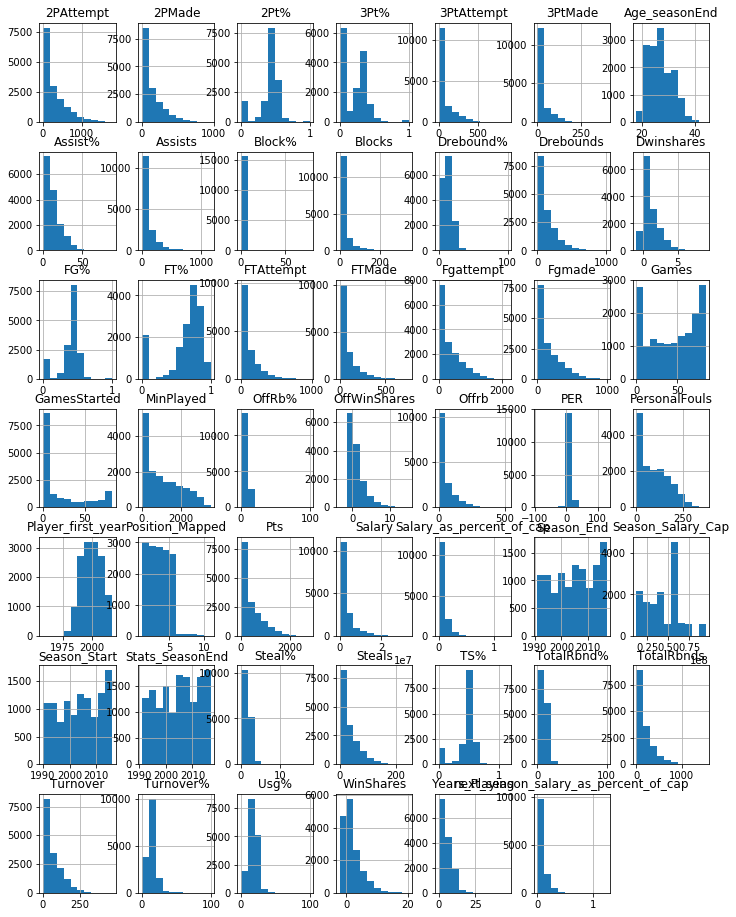

In [22]:
data.hist(figsize=(12,16));

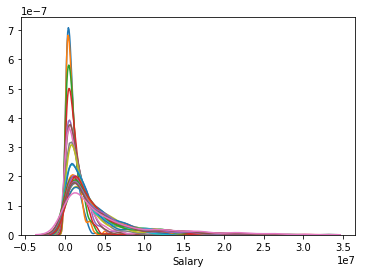

In [28]:
for season in range(1991, 2018):
    season_data = data.loc[data.loc[:, 'Stats_SeasonEnd'] == season, :]
    ax = sns.distplot(season_data['Salary'], hist=False)


Salary distribution has pretty much been the same throughout the years

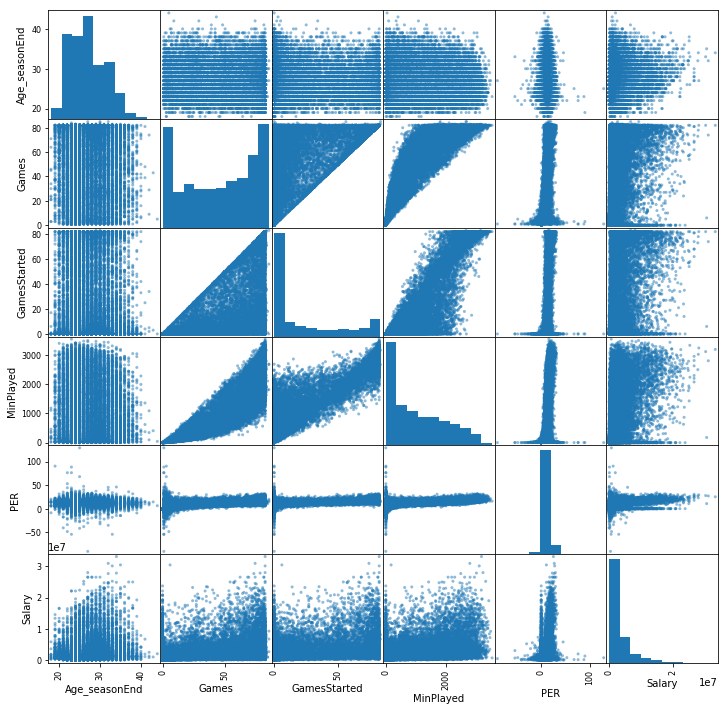

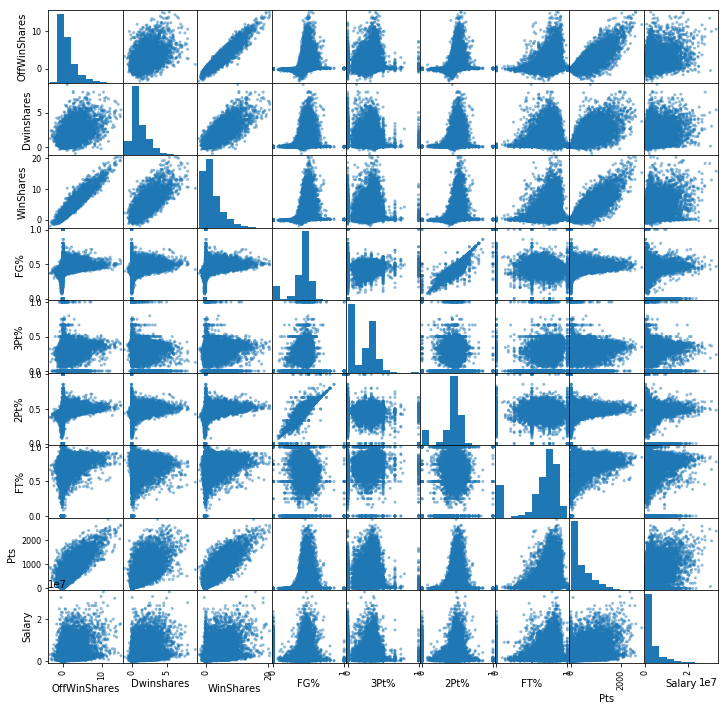

In [29]:
#running several scatter_matrix plots because it's a lot to look at...
pd.plotting.scatter_matrix(data.loc[:, ['Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'Salary']], figsize=(12, 12));

pd.plotting.scatter_matrix(data.loc[:, ['OffWinShares', 'Dwinshares', 'WinShares',
 'FG%', '3Pt%','2Pt%', 'FT%', 'Pts', 'Salary']], figsize=(12, 12));


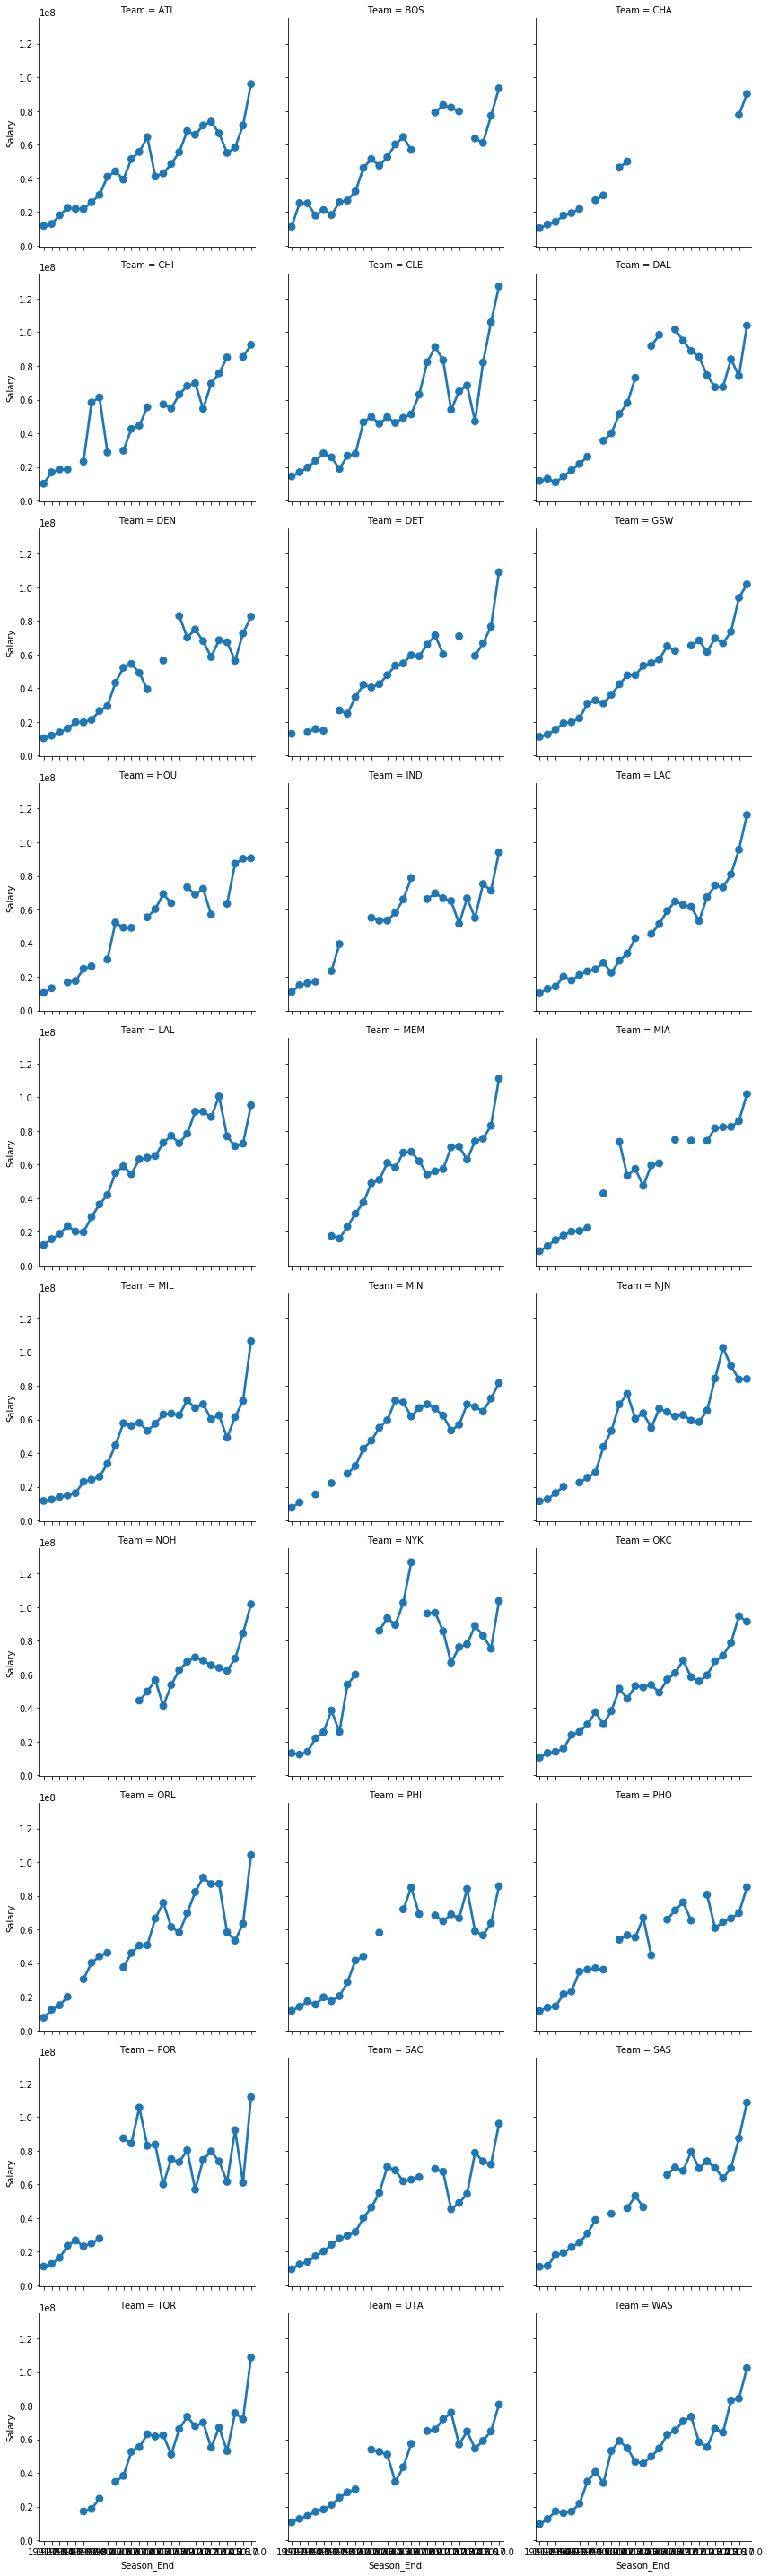

In [30]:
salary_by_year = data.loc[:, ['Team', 'Season_End', 'Salary', 'WinShares']].groupby(['Team', 'Season_End']).sum(axis=1)
salary_by_year.reset_index(inplace=True)

sns.factorplot(x='Season_End', y='Salary', col='Team', col_wrap=3, data=salary_by_year);

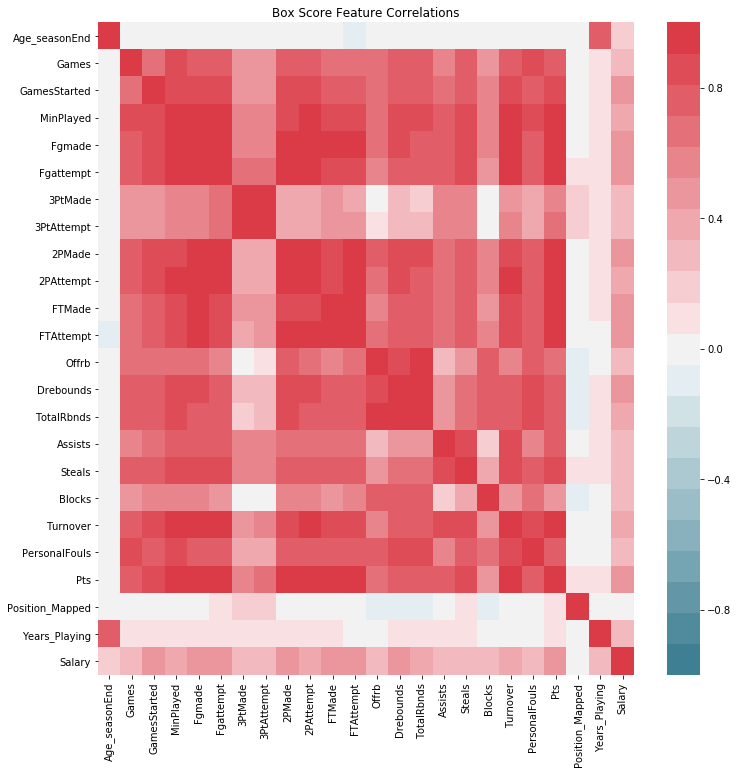

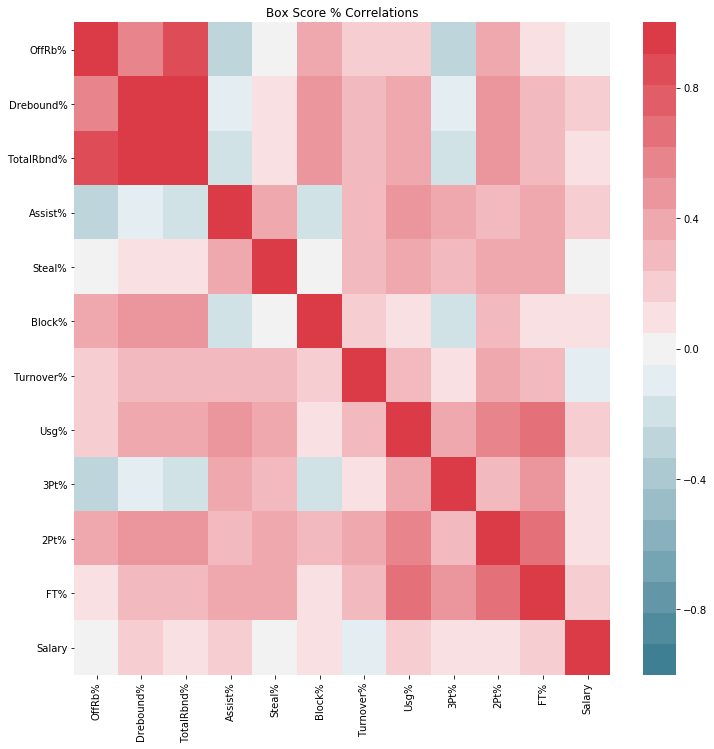

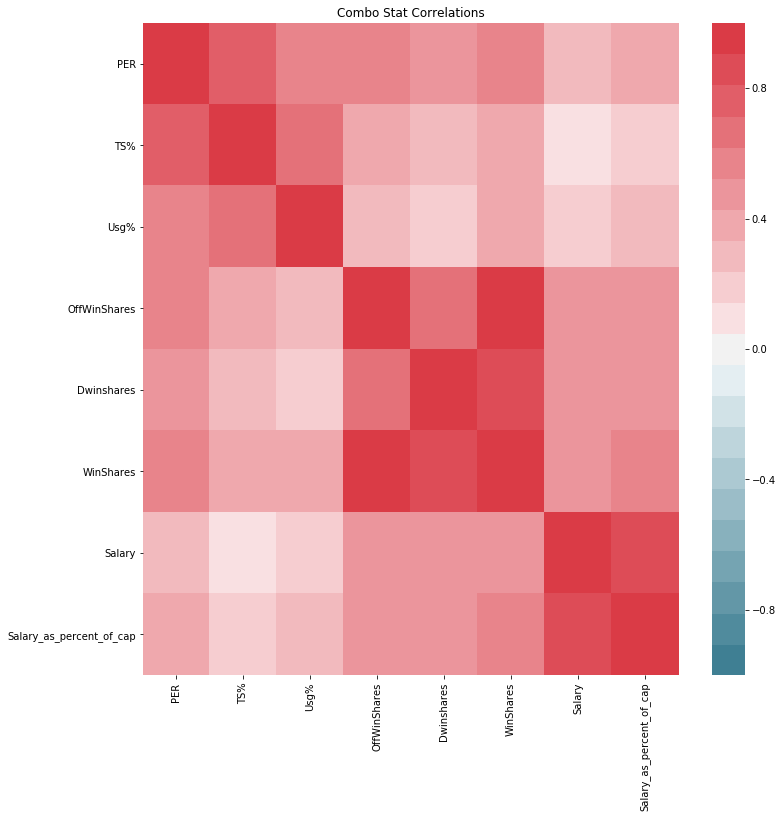

In [31]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.loc[:, ['Age_seasonEnd','Games','GamesStarted','MinPlayed',
                      'Fgmade','Fgattempt','3PtMade','3PtAttempt','2PMade','2PAttempt',
                      'FTMade','FTAttempt','Offrb','Drebounds','TotalRbnds','Assists',
                      'Steals','Blocks','Turnover','PersonalFouls','Pts','Position_Mapped', 'Years_Playing', 'Salary']].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21),
           ax=ax);
ax.set_title('Box Score Feature Correlations');

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.loc[:, ['OffRb%','Drebound%','TotalRbnd%','Assist%','Steal%','Block%','Turnover%','Usg%',
                         '3Pt%','2Pt%','FT%', 'Salary']].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21),
           ax=ax);
ax.set_title('Box Score % Correlations');


fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.loc[:, ['PER','TS%','Usg%','OffWinShares','Dwinshares','WinShares', 'Salary', 'Salary_as_percent_of_cap']].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21),
           ax=ax);
ax.set_title('Combo Stat Correlations');

Text(0.5,1,'Points vs Salary as % of Cap')

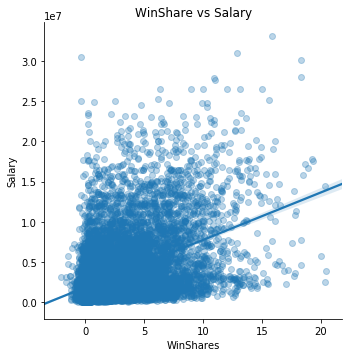

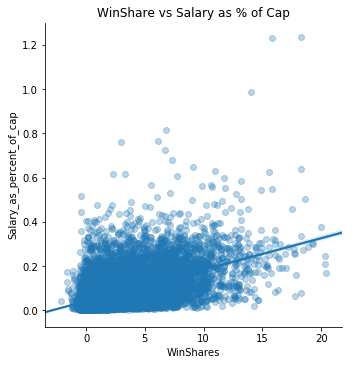

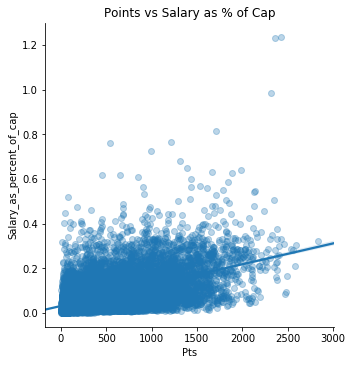

In [32]:
#Salary vs Key Columns

morethan70minperseason = data.loc[data.loc[:, 'MinPlayed'] >= 70, :]

sns.lmplot(data=morethan70minperseason, x='WinShares', y='Salary', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("WinShare vs Salary")

sns.lmplot(data=morethan70minperseason, x='WinShares', y='Salary_as_percent_of_cap', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("WinShare vs Salary as % of Cap")

sns.lmplot(data=morethan70minperseason, x='Pts', y='Salary_as_percent_of_cap', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("Points vs Salary as % of Cap")

# Modeling!

### Starting with null model:
- For null model, assume salary as % of cap is always equal to an equal distribution among 12 players/team, which is 100/12 = 8.33%

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

rmse_dict = {}

In [44]:

modeldata = data.loc[(data.loc[:, 'next_season_salary'].notnull()) & 
                     (data.loc[:, 'MinPlayed'] > 140), :]
modeldata.loc[:, 'prediction'] = .083333
nullrmse = np.sqrt(metrics.mean_squared_error(modeldata.next_season_salary_as_percent_of_cap, modeldata.prediction))
rmse_dict['nullrmse'] = nullrmse

C:\Users\testr\Anaconda\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\testr\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [45]:
box_score_features = ['Age_seasonEnd','Games','GamesStarted','MinPlayed',
                      'Fgmade','Fgattempt','3PtMade','3PtAttempt','2PMade','2PAttempt',
                      'FTMade','FTAttempt','Offrb','Drebounds','TotalRbnds','Assists',
                      'Steals','Blocks','Turnover','PersonalFouls','Pts','Position_Mapped', 'Years_Playing']
box_score_percentages = ['OffRb%','Drebound%','TotalRbnd%','Assist%','Steal%','Block%','Turnover%','Usg%',
                         '3Pt%','2Pt%','FT%']
combo_features = ['PER','TS%','Usg%','OffWinShares','Dwinshares','WinShares']

In [46]:
X = modeldata.loc[:, box_score_features]
y = modeldata.loc[:, 'next_season_salary_as_percent_of_cap']

scaler = StandardScaler()
X = scaler.fit_transform(X)

linreg = LinearRegression()
linreg.fit(X, y)

score = (cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))

box_score_vs_next_season_sal_rmse = np.mean(np.sqrt(-score))
box_score_vs_next_season_sal_rmse
rmse_dict['boxscore_only_linreg'] = box_score_vs_next_season_sal_rmse

In [47]:
#Just combo stats

X = modeldata.loc[:, combo_features]
y = modeldata.loc[:, 'next_season_salary_as_percent_of_cap']

scaler = StandardScaler()
X = scaler.fit_transform(X)

linreg = LinearRegression()
linreg.fit(X, y)

score = (cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
combo_stats_rmse = np.mean(np.sqrt(-score))
rmse_dict['combostats_linreg'] = combo_stats_rmse

## Decision Trees!

In [48]:
from sklearn.tree import DecisionTreeRegressor

feature_cols = ['Age_seasonEnd','Games','GamesStarted','MinPlayed',
                      'Fgmade','Fgattempt','3PtMade','3PtAttempt','2PMade','2PAttempt',
                      'FTMade','FTAttempt','Offrb','Drebounds','TotalRbnds','Assists',
                      'Steals','Blocks','Turnover','PersonalFouls','Pts','Position_Mapped', 'Years_Playing',
                      'OffRb%','Drebound%','TotalRbnd%','Assist%','Steal%','Block%','Turnover%','Usg%',
                      '3Pt%','2Pt%','FT%']
modeldata = data.loc[(data.loc[:, 'next_season_salary'].notnull()) & (data.loc[:, 'MinPlayed'] > 140), :]

X = modeldata.loc[:, feature_cols]
y = modeldata.loc[:, 'next_season_salary_as_percent_of_cap']

# List of values to try:
max_depth_range = list(range(1, 10))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

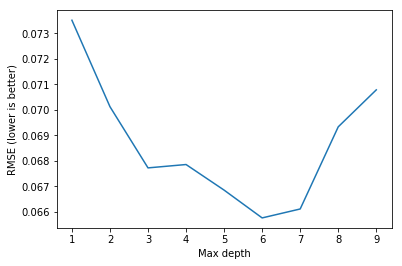

In [49]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('Max depth')
plt.ylabel('RMSE (lower is better)');

In [51]:
treereg = DecisionTreeRegressor(max_depth=5, random_state=1)
treereg.fit(X,y)

importance = pd.DataFrame({'features': feature_cols, 'importance':treereg.feature_importances_})
importance.sort_values('importance', ascending=False)
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_dict['decisiontree_one'] = np.mean(np.sqrt(-scores))